In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [15]:
df = pd.read_csv('IRIS.csv')
df.shape

(150, 5)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
sepal_df= df[['sepal_length','sepal_width','species']]
sepal_df.head()

,sepal_length,sepal_width,species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


### Scatterplot

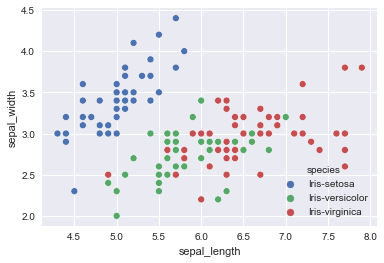

In [21]:
sns.scatterplot(data=sepal_df,x='sepal_length',y='sepal_width',hue='species')
plt.show()

In [22]:
sepal_df.describe()


,sepal_length,sepal_width
count,150.000000,150.000000
mean,5.843333,3.054000
std,0.828066,0.433594
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


In [34]:
iris = datasets.load_iris()
iris_df=pd.DataFrame(iris['data'])

In [35]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Elbow Method to pick optimal number for k

In [46]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(iris_df)
    distortions.append(kmeanModel.inertia_)

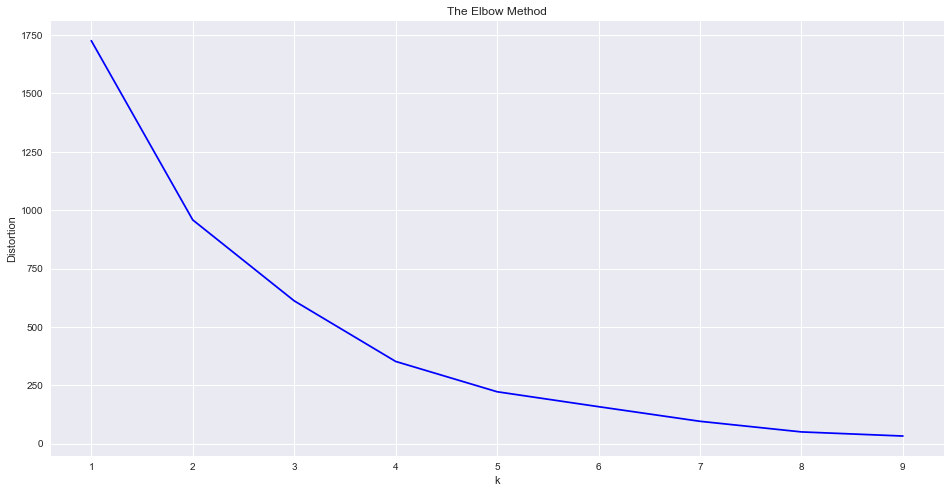

In [47]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

We can see the elbow is number 3 and is optimal for this case. We can now run KMeans using n_clusters=3

In [57]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(iris_df)

KMeans(n_clusters=3)

Text(0.5, 1.0, 'K_Means')

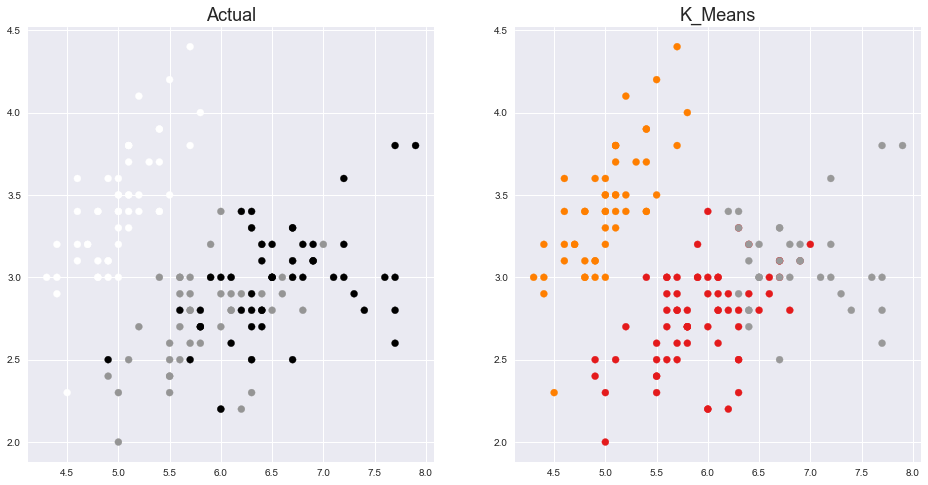

In [58]:
iris_df['k_means']=kmeanModel.predict(iris_df)
iris_df['target']=iris['target']

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(iris_df[0], iris_df[1], c=iris_df['target'])
axes[1].scatter(iris_df[0], iris_df[1], c=iris_df['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)